Statistical Description and Exploratory Analysis on Aviation Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
url = 'https://raw.githubusercontent.com/zzzhimin/DSAI-Mini-Project/master/AviationData.csv'
baseData = pd.read_csv(url,encoding = "ISO-8859-1")

In [3]:
baseData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,2019-12-28,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,03/01/2020


In [4]:
baseData.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                  float64
Longitude                 float64
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.Flight          object
Air.Carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.of.Flight      object
Report.Status 

In [5]:
aviationData = pd.DataFrame(baseData[['Country', 'Injury.Severity', 'Aircraft.Damage', 'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Purpose.of.Flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.Phase.of.Flight']])

In [6]:
aviationData.dtypes

Country                    object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Make                       object
Model                      object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Purpose.of.Flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.of.Flight      object
dtype: object

In [7]:
aviationData.head()

,Country,Injury.Severity,Aircraft.Damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight
0,United States,Non-Fatal,Substantial,Airplane,Cessna,175,1.0,Reciprocating,Part 91: General Aviation,Personal,NaN,NaN,NaN,1.0,VMC,TAKEOFF
1,United States,Fatal(2),Destroyed,Airplane,Mooney,M20S,1.0,Reciprocating,Part 91: General Aviation,Personal,2.0,NaN,NaN,NaN,VMC,TAKEOFF
2,United States,Non-Fatal,Substantial,Airplane,Cessna,170,1.0,NaN,Part 91: General Aviation,Personal,NaN,NaN,NaN,2.0,NaN,NaN
3,United States,Non-Fatal,Substantial,Airplane,Vans,RV 10,NaN,NaN,Part 91: General Aviation,Personal,NaN,NaN,NaN,1.0,NaN,NaN
4,United States,Unavailable,Substantial,NaN,Cessna,170,1.0,NaN,Public Aircraft,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
aviationData['Response'] = 0
aviationData['Response'] = aviationData.Response.astype(float)

In [9]:
for i in aviationData:
    if(aviationData[i].dtypes == 'float64'):
        aviationData[i] = aviationData[i].fillna(0)
    else:
        aviationData[i] = aviationData[i].fillna("Unknown")

In [10]:
aviationData.head()
aviationData.dtypes

Country                    object
Injury.Severity            object
Aircraft.Damage            object
Aircraft.Category          object
Make                       object
Model                      object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Purpose.of.Flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.Phase.of.Flight      object
Response                  float64
dtype: object

In [11]:
for index, row in aviationData.iterrows():
    totalPassengers = row['Total.Uninjured'] + row['Total.Serious.Injuries'] + row['Total.Fatal.Injuries'] + row['Total.Minor.Injuries']
    
    if(totalPassengers == 0):
        totalPassengers = 1
    
    if(row['Total.Fatal.Injuries'] > 0):
        baseFactor = 0
    elif(row['Total.Serious.Injuries'] > 0):
        baseFactor = 0.5
    elif(row['Total.Minor.Injuries'] > 0):
        baseFactor = 0.75
    else:
        baseFactor = 1.00
    
    if(row['Aircraft.Damage'] == "Destroyed"):
        damageFactor = 0.25
    elif(row['Aircraft.Damage'] == "Substantial"):
        damageFactor = 0.50
    elif(row['Aircraft.Damage'] == "Minor"):
        damageFactor = 0.75
    else:
        damageFactor = 1
    
    if(row['Weather.Condition'] == "VMC"):
        weatherFactor = 0.75
    else:
        weatherFactor = 1;
    try:    
        response = ((baseFactor * damageFactor * weatherFactor)/(totalPassengers)) * 100
    except:
        response = 100
        
    aviationData.at[index, 'Response'] = response

In [12]:
aviationData.head()

,Country,Injury.Severity,Aircraft.Damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Response
0,United States,Non-Fatal,Substantial,Airplane,Cessna,175,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,1.0,VMC,TAKEOFF,37.5
1,United States,Fatal(2),Destroyed,Airplane,Mooney,M20S,1.0,Reciprocating,Part 91: General Aviation,Personal,2.0,0.0,0.0,0.0,VMC,TAKEOFF,0.0
2,United States,Non-Fatal,Substantial,Airplane,Cessna,170,1.0,Unknown,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,Unknown,Unknown,25.0
3,United States,Non-Fatal,Substantial,Airplane,Vans,RV 10,0.0,Unknown,Part 91: General Aviation,Personal,0.0,0.0,0.0,1.0,Unknown,Unknown,50.0
4,United States,Unavailable,Substantial,Unknown,Cessna,170,1.0,Unknown,Public Aircraft,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,50.0


In [13]:
aviationNumData = aviationData.loc[:, aviationData.dtypes == np.float64]
aviationCatData = aviationData.loc[:, aviationData.dtypes == np.object]


Statistical summary of Number.of.Engines: 

Data type :  <class 'pandas.core.series.Series'>
Data dims :  84262

 count    84262.000000
mean         1.078410
std          0.511634
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64

Statistical summary of Total.Fatal.Injuries: 

Data type :  <class 'pandas.core.series.Series'>
Data dims :  84262

 count    84262.000000
mean         0.573972
std          5.193191
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

Statistical summary of Total.Serious.Injuries: 

Data type :  <class 'pandas.core.series.Series'>
Data dims :  84262

 count    84262.000000
mean         0.214094
std          1.116459
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        111.000000
Name: Total.Serious.Injuries, dtype:

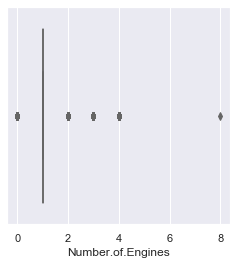

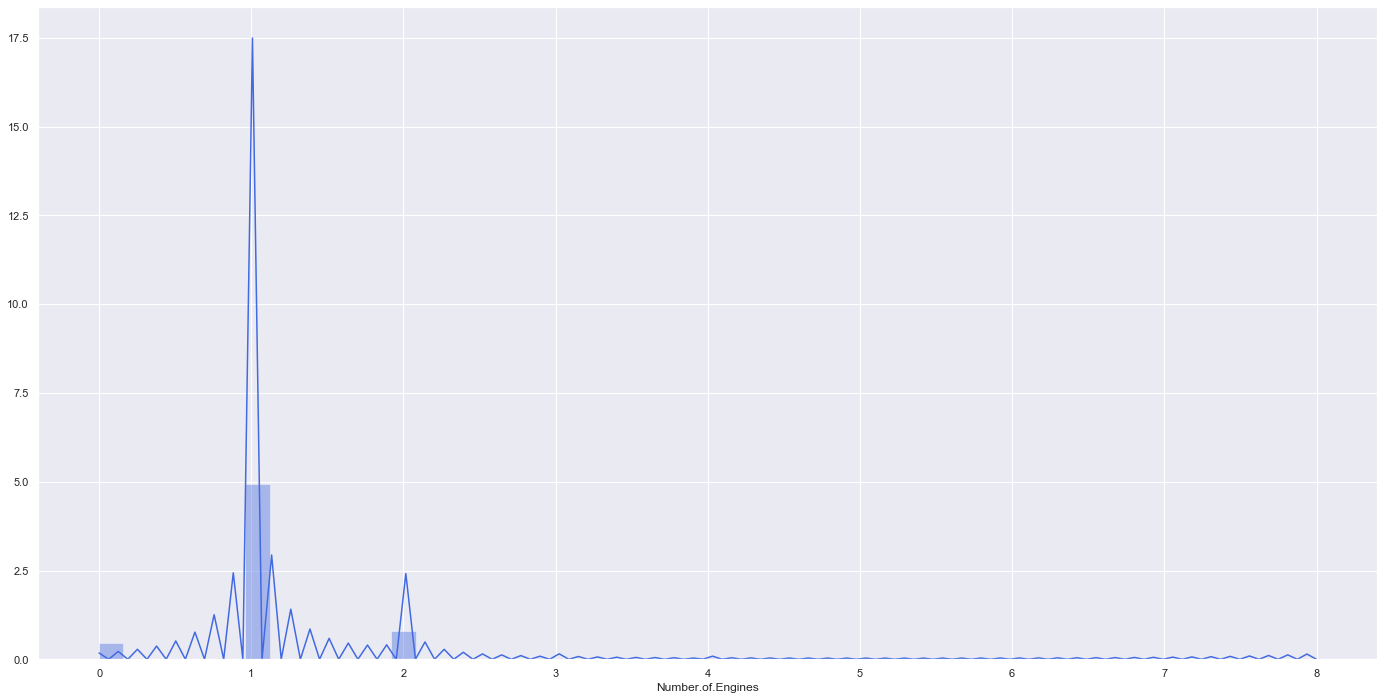

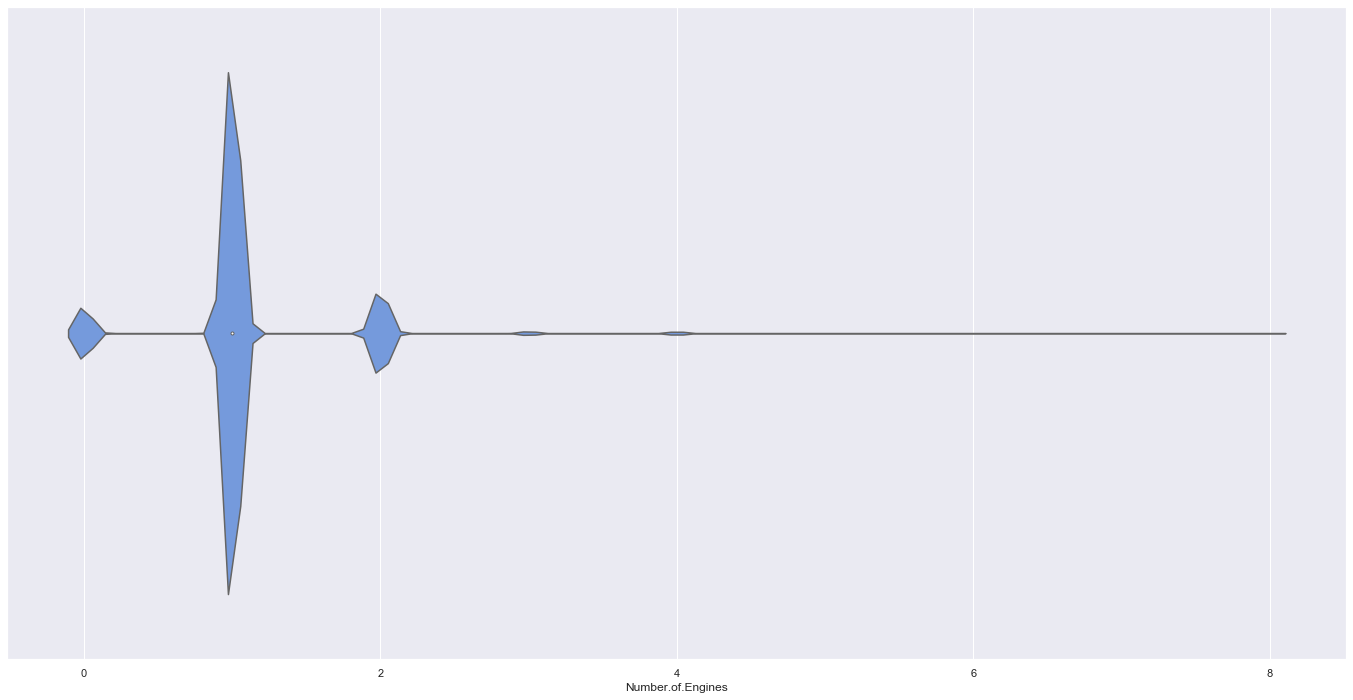

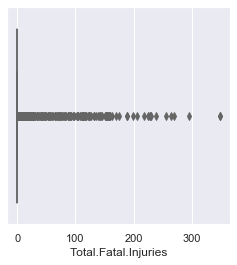

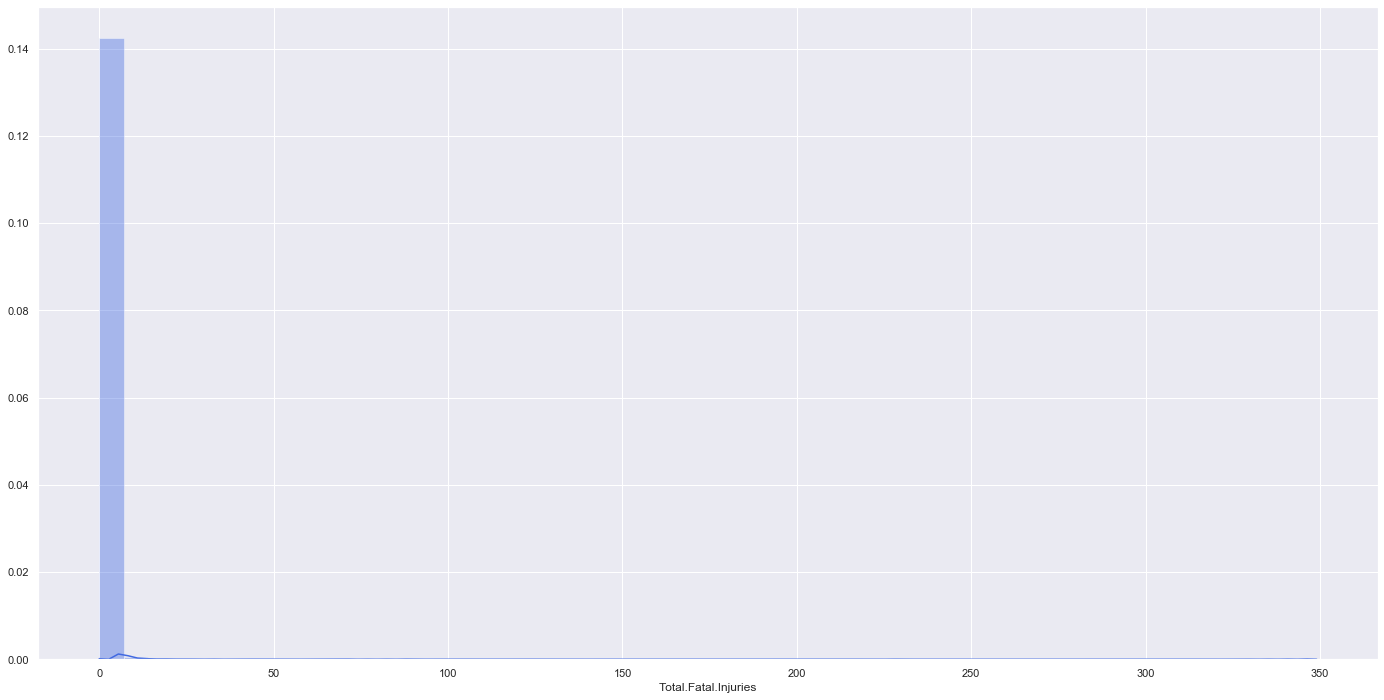

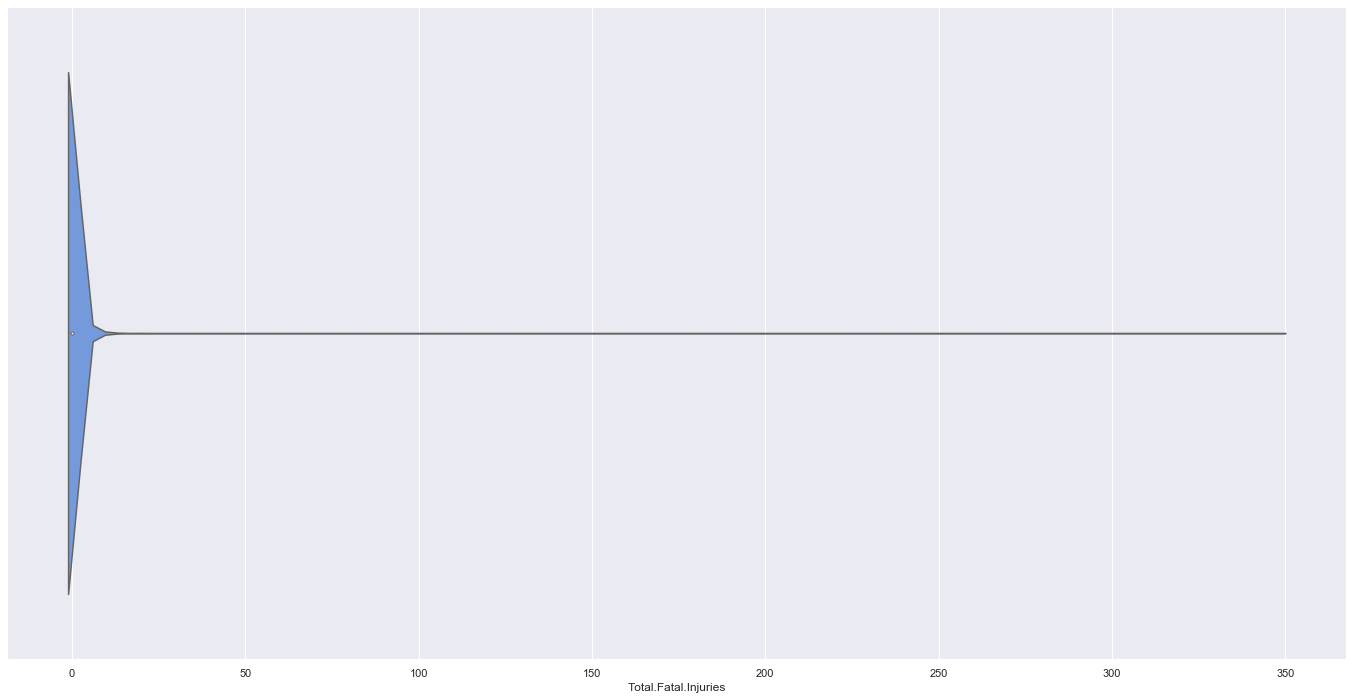

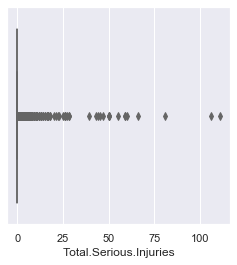

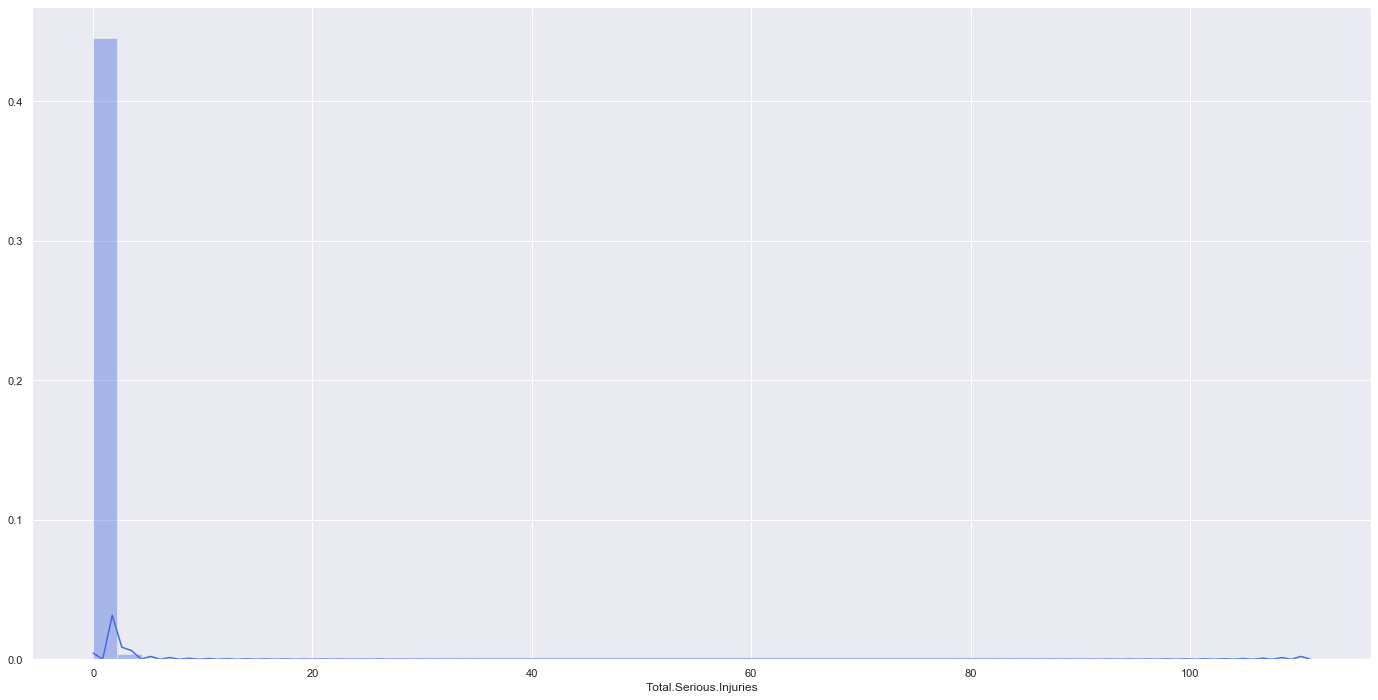

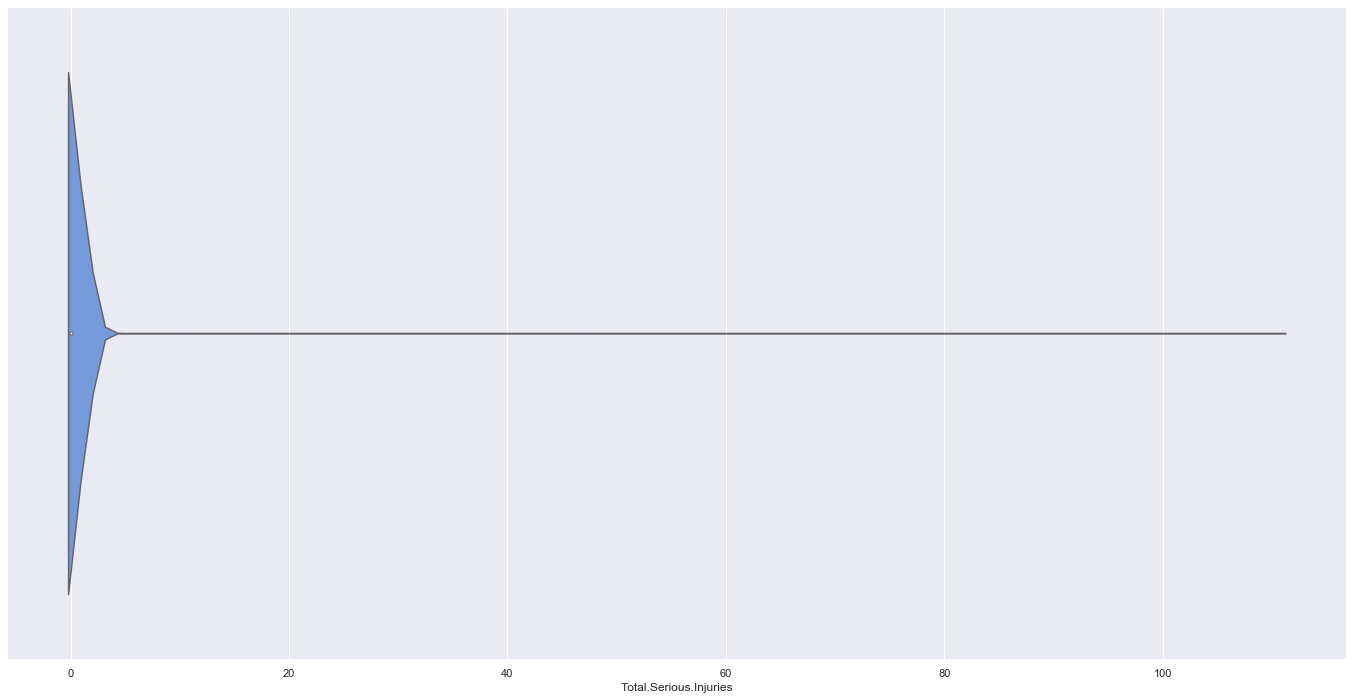

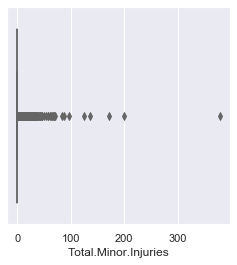

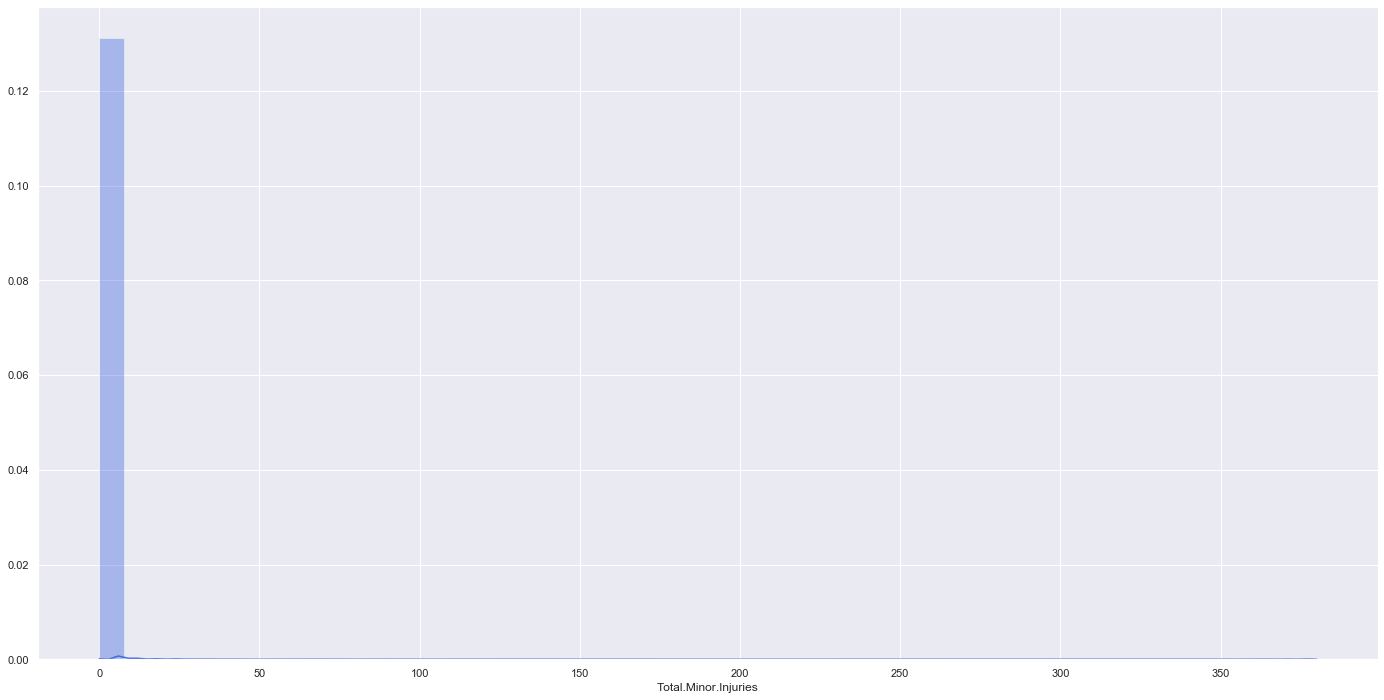

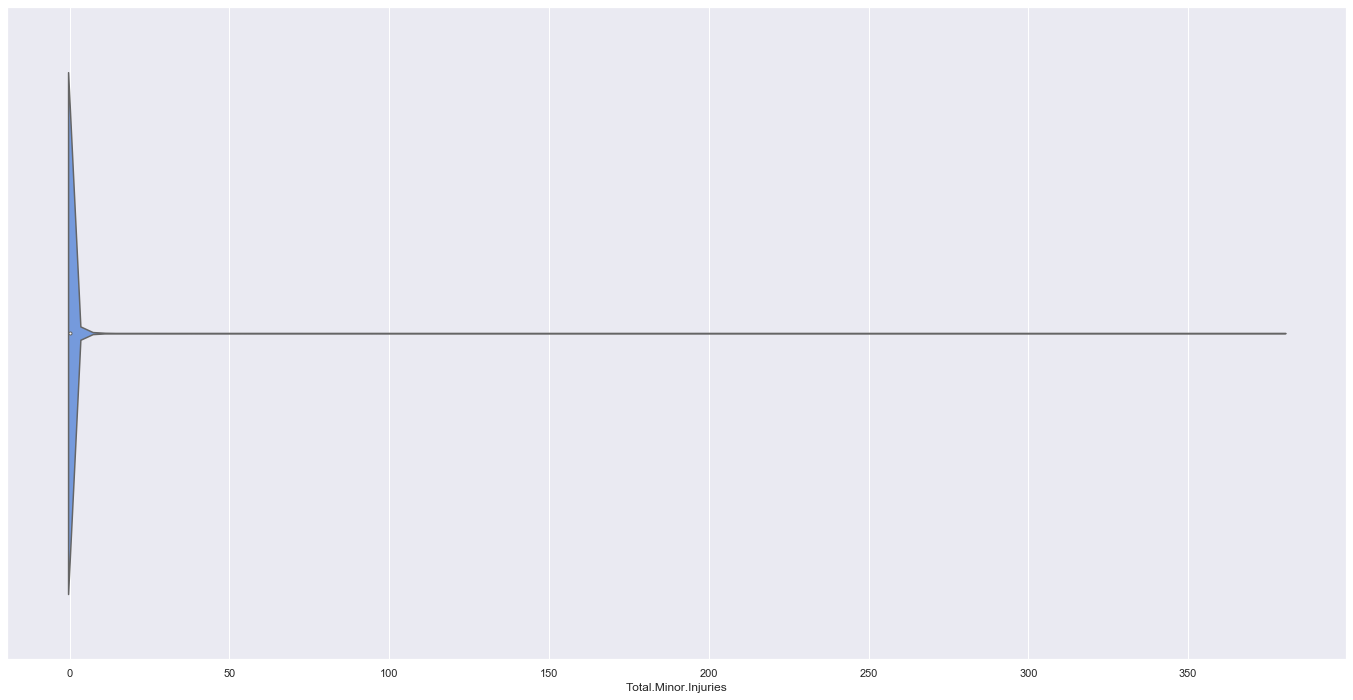

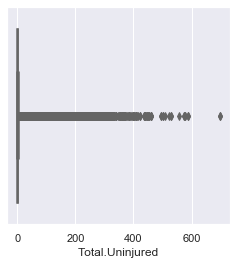

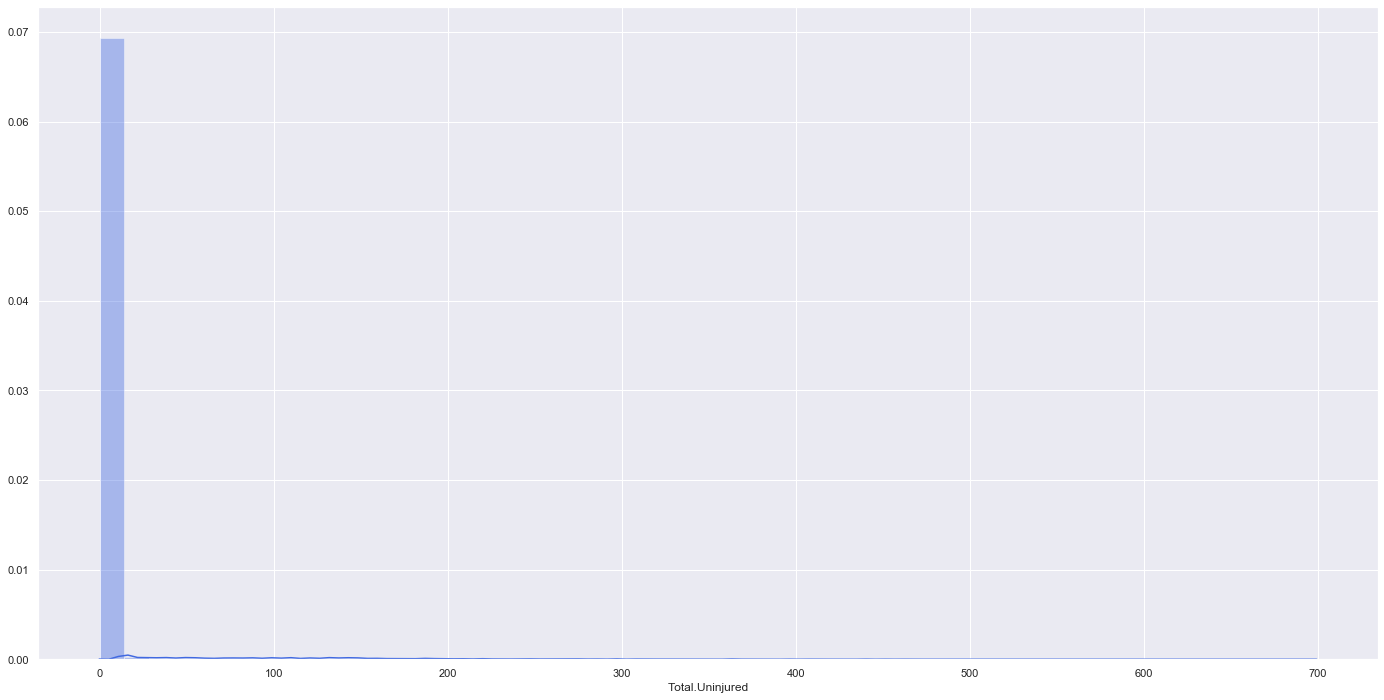

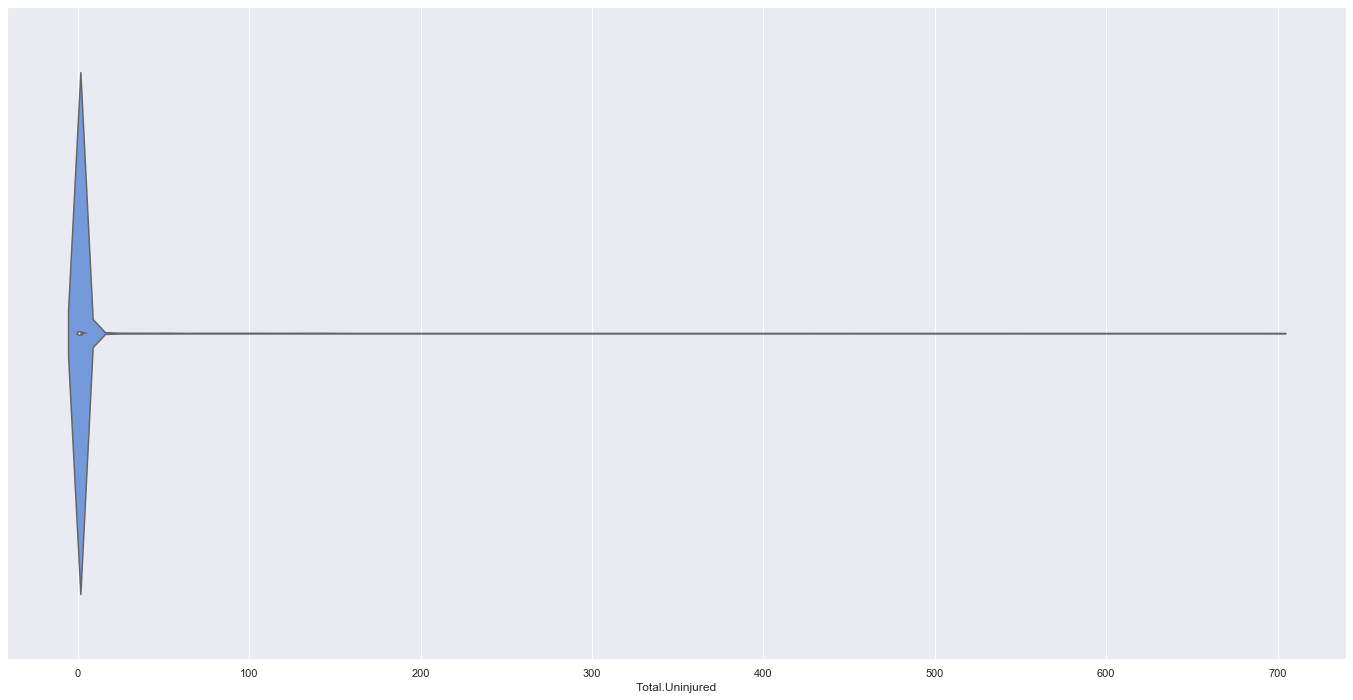

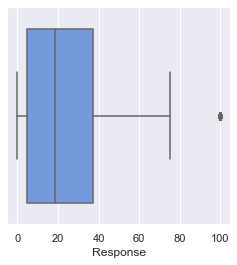

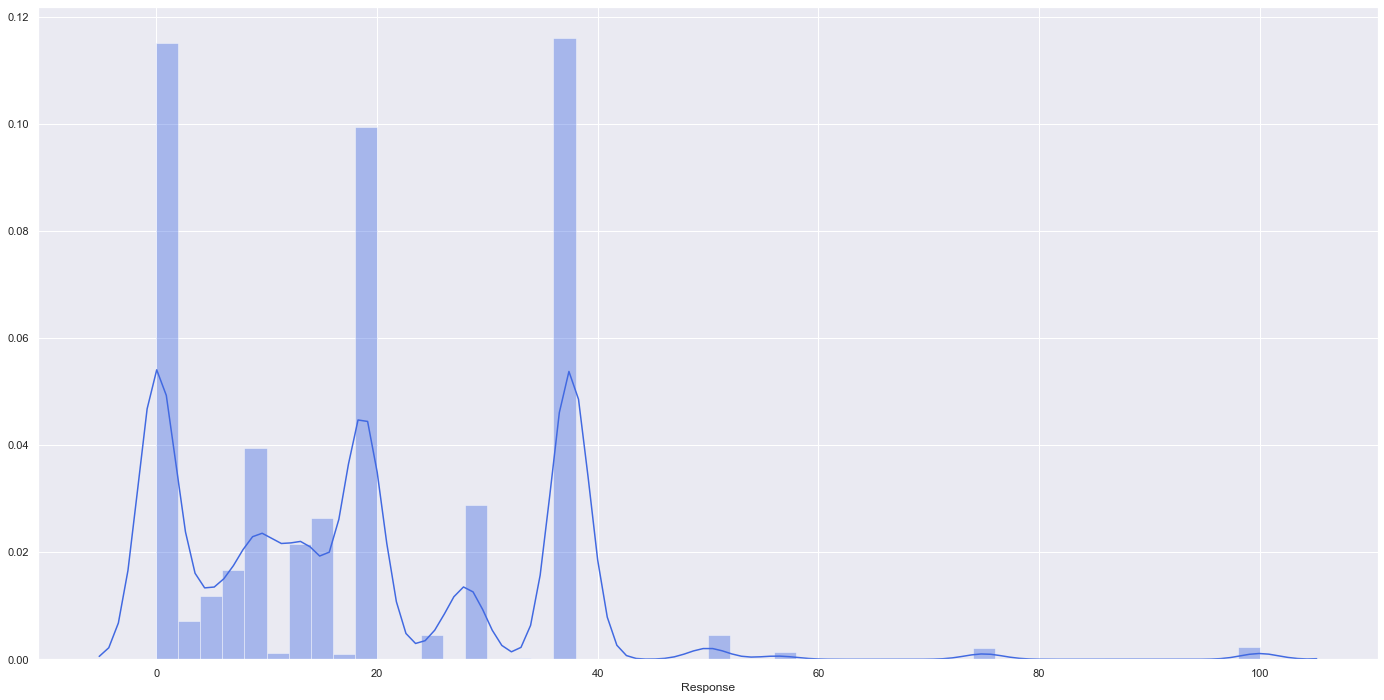

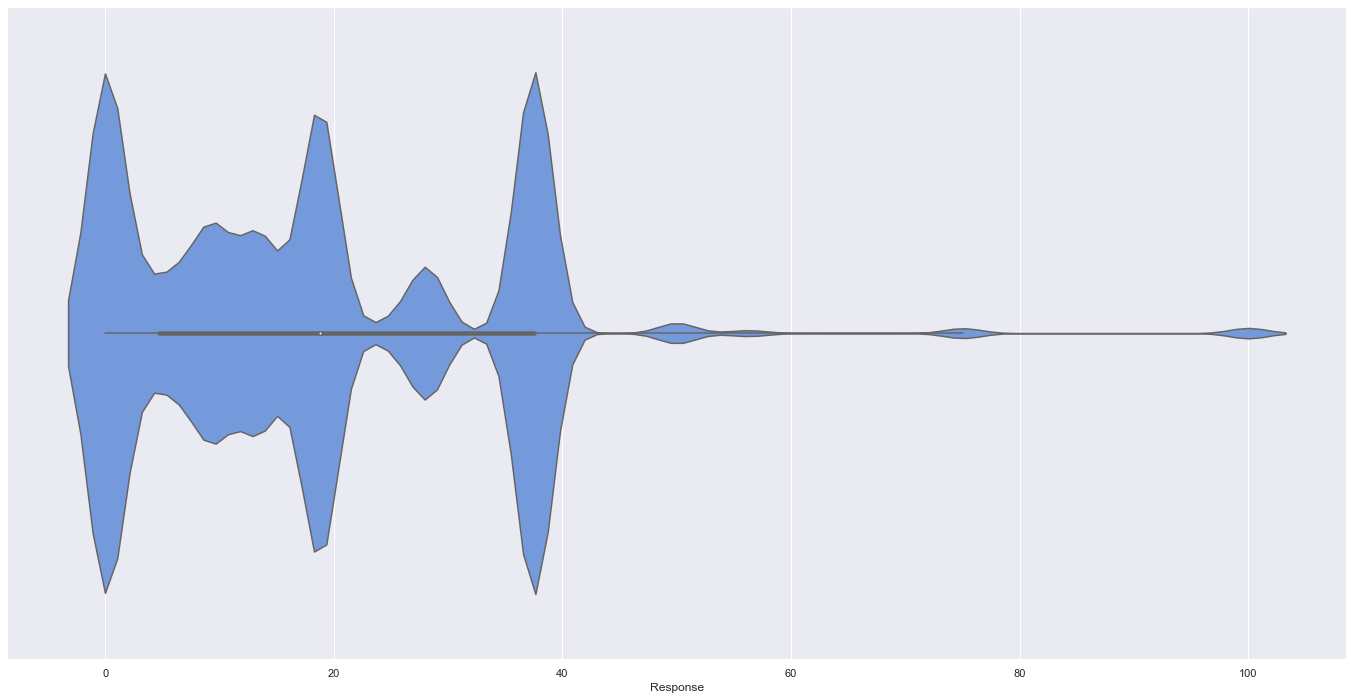

In [17]:
for i in aviationNumData:
    print("\nStatistical summary of " + i + ": \n")
    print("Data type : ", type(aviationNumData[i]))
    print("Data dims : ", aviationNumData[i].size)
    print("\n", aviationNumData[i].describe())
    f, axes = plt.subplots(1, 1, figsize=(4, 4))
    sb.boxplot(aviationNumData[i], orient = "h", color = "cornflowerblue")
    f, axes = plt.subplots(1, 1, figsize=(24, 12))
    sb.distplot(aviationNumData[i], color = "royalblue")
    f, axes = plt.subplots(1, 1, figsize=(24, 12))
    sb.violinplot(aviationNumData[i], color = "cornflowerblue")